# AP Final Project

## importing relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

### Uploading dataset

In [2]:
df=pd.read_csv('laptops.csv',encoding='latin-1')

In [3]:
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


### Dropping the first column

In [4]:
df.drop(df.columns[0],axis=1,inplace=True)

In [5]:
df.sample(10)

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
684,Lenovo,Yoga 730,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.19kg,1499.00
756,HP,15-cb003na (i5-7300HQ/8GB/1TB,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.2kg,1099.00
169,HP,ProBook 430,Notebook,13.3,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4GB,500GB HDD,Intel UHD Graphics 620,Windows 10,1.49kg,754.00
253,Lenovo,Yoga 920-13IKB,2 in 1 Convertible,13.9,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 8550U 1.8GHz,8GB,512GB SSD,Intel UHD Graphics 620,Windows 10,1.37kg,1849.00
797,Dell,Latitude 3580,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8GB,128GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,810.00
108,MSI,GP62M 7REX,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.2kg,1299.00
598,Dell,Latitude 5289,2 in 1 Convertible,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.34kg,1670.00
457,Microsoft,Surface Laptop,Ultrabook,13.5,Touchscreen 2256x1504,Intel Core M m3-7Y30 2.2GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10 S,1.252kg,989.00
724,MSI,GL72M 7REX,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.7kg,1348.48
1115,Dell,XPS 13,Ultrabook,13.3,Full HD 1920x1080,Intel Core i7 7560U 2.4GHz,8GB,256GB SSD,Intel Iris Plus Graphics 640,Windows 10,1.23kg,1379.00


### Checking statistics of the dataset

In [6]:
df.shape

(1303, 12)

In [7]:
df.isnull().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

No missing values 

In [8]:
df.describe(include='all')

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
count,1303,1303,1303,1303.000000,1303,1303,1303,1303,1303,1303,1303,1303.000000
unique,19,618,6,NaN,40,118,9,39,110,9,179,NaN
top,Dell,XPS 13,Notebook,NaN,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.2kg,NaN
freq,297,30,727,NaN,507,190,619,412,281,1072,121,NaN
mean,NaN,NaN,NaN,15.017191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1123.686992
std,NaN,NaN,NaN,1.426304,NaN,NaN,NaN,NaN,NaN,NaN,NaN,699.009043
min,NaN,NaN,NaN,10.100000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.000000
25%,NaN,NaN,NaN,14.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,599.000000
50%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,977.000000
75%,NaN,NaN,NaN,15.600000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1487.880000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   Product           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price_euros       1303 non-null   float64
dtypes: float64(2), object(10)
memory usage: 122.3+ KB


#### checking datatypes for attributes

In [10]:
df.dtypes

Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

## Data Cleaning

#### cleaning memory column

In [11]:
df['Memory']=df['Memory'].str.replace('1.0','1')
df['Memory']=df['Memory'].str.replace('Hybrid','HDD')

C:\Users\sourav\AppData\Local\Temp/ipykernel_18752/2211587463.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Memory']=df['Memory'].str.replace('1.0','1')


#### coverting weight to numeric

In [12]:
df['Weight'].replace('kg','',True,regex=True)

In [13]:
df.rename(columns={'Weight':'weight_kgs'},inplace=True)

In [14]:
df.weight_kgs=df.weight_kgs.astype(float)

#### euros to ruppes conversion

In [15]:
df['price_in_rs']=df['Price_euros']*84.75

In [16]:
df.drop('Price_euros',axis=1,inplace=True)

#### Converting to int

In [17]:
df.Ram.replace('(GB)$','',regex=True,inplace=True)
df.Ram=df.Ram.astype(int)

In [18]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,weight_kgs,price_in_rs
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,113538.7275
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,76185.1650
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,48731.2500
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,215048.8875
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,152855.1000


#### reducing memory down to 4 values

In [19]:
df.Memory.value_counts()

256GB SSD                        412
1TB HDD                          233
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              74
32GB Flash Storage                38
2TB HDD                           16
512GB SSD +  1TB HDD              15
64GB Flash Storage                15
1TB SSD                           14
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
1GB SSD                            5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
1TB SSD +  1TB HDD                 2
256GB SSD +  256GB SSD             2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
512GB Flash Storage                2
8GB SSD                            1
240GB SSD                          1
1

In [20]:
import re

In [21]:
for i in range(len(df['Memory'])):
    #print(df.Memory[i])
    x=re.search('[/+]',df.Memory[i])
    if x!=None:
        df.Memory[i]=str('SSD and HDD')

C:\Users\sourav\AppData\Local\Temp/ipykernel_18752/2919162163.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Memory[i]=str('SSD and HDD')


In [22]:
for i in range(len(df['Memory'])):
       df.Memory[i]=df.Memory[i].split(' ')[1] 

C:\Users\sourav\AppData\Local\Temp/ipykernel_18752/2319348506.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Memory[i]=df.Memory[i].split(' ')[1]


In [23]:
df.Memory.replace('and','SSD and HDD',inplace=True)

In [24]:
df.Memory.value_counts()

SSD            637
HDD            384
SSD and HDD    208
Flash           74
Name: Memory, dtype: int64

In [25]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,weight_kgs,price_in_rs
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,SSD,Intel Iris Plus Graphics 640,macOS,1.37,113538.7275
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Flash,Intel HD Graphics 6000,macOS,1.34,76185.1650
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,SSD,Intel HD Graphics 620,No OS,1.86,48731.2500
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,SSD,AMD Radeon Pro 455,macOS,1.83,215048.8875
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,SSD,Intel Iris Plus Graphics 650,macOS,1.37,152855.1000


In [26]:
df_cleaned=df.copy()

In [27]:
df_cleaned.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,weight_kgs,price_in_rs
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,SSD,Intel Iris Plus Graphics 640,macOS,1.37,113538.7275
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Flash,Intel HD Graphics 6000,macOS,1.34,76185.1650
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,SSD,Intel HD Graphics 620,No OS,1.86,48731.2500
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,SSD,AMD Radeon Pro 455,macOS,1.83,215048.8875
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,SSD,Intel Iris Plus Graphics 650,macOS,1.37,152855.1000


In [28]:
df_for_web=df_cleaned.copy()

In [29]:
df_for_web.drop(['Product','Inches','ScreenResolution','Cpu','Gpu','weight_kgs'],axis=1,inplace=True)

## Exploratory Data Analysis

### checking correlations

In [30]:
(df_cleaned[['Inches','weight_kgs','Ram','price_in_rs']]).corr()

,Inches,weight_kgs,Ram,price_in_rs
Inches,1.000000,0.827631,0.237993,0.068197
weight_kgs,0.827631,1.000000,0.383874,0.210370
Ram,0.237993,0.383874,1.000000,0.743007
price_in_rs,0.068197,0.210370,0.743007,1.000000


##### correlation matrix

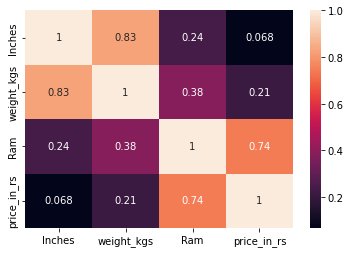

In [31]:
sns.heatmap(df_cleaned[['Inches','weight_kgs','Ram','price_in_rs']].corr(),annot=True)
plt.show()

### Plotting attributes against each other

#### weight vs price

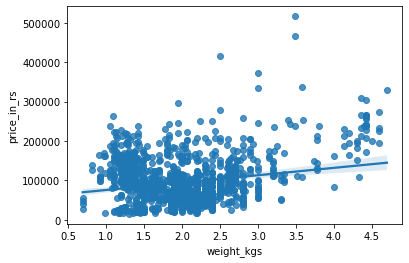

In [32]:
sns.regplot(data=df_cleaned,x='weight_kgs',y='price_in_rs')
plt.show()

#### ram vs prices

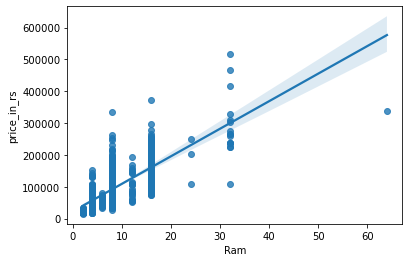

In [33]:
sns.regplot(data=df_cleaned,x='Ram',y='price_in_rs')
plt.show()

#### inches vs price

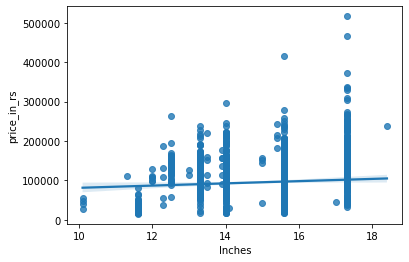

In [34]:
sns.regplot(data=df_cleaned,x='Inches',y='price_in_rs')
plt.show()

### Checking company wise prices across variants

In [35]:
df_1=df[['Company','TypeName','price_in_rs']]
grouped=df_1.groupby(['Company','TypeName'],as_index=False).mean()
pivoted=grouped.pivot(index='Company',columns='TypeName').replace(np.nan,'0').astype(float)
pivoted

price_in_rs                                            \
TypeName  2 in 1 Convertible         Gaming     Netbook       Notebook   
Company                                                                  
Acer            59219.168438  124423.593750  25933.5000   45776.843269   
Apple               0.000000       0.000000      0.0000       0.000000   
Asus            82748.661346  145770.455139  22560.4500   53146.927388   
Chuwi               0.000000       0.000000      0.0000   26636.642500   
Dell            95909.060750  162583.806750  44027.6250   73814.132227   
Fujitsu             0.000000       0.000000      0.0000   61782.750000   
Google              0.000000       0.000000      0.0000       0.000000   
HP             127702.147500  120691.062500  85315.0000   69209.111535   
Huawei              0.000000       0.000000      0.0000       0.000000   
LG                  0.000000       0.000000      0.0000       0.000000   
Lenovo         126332.375625  112630.048594  62354.8125   66880.424410   
MSI                 0.000000  146524.965556      0.0000       0.000000   
Mediacom        25340.250000       0.000000      0.0000   24944.750000   
Microsoft           0.000000       0.000000      0.0000       0.000000   
Razer               0.000000  349085.250000      0.0000       0.000000   
Samsung        104157.750000       0.000000  22797.7500  143990.250000   
Toshiba             0.000000       0.000000      0.0000   93987.750000   
Vero                0.000000       0.000000      0.0000   18426.768750   
Xiaomi              0.000000       0.000000      0.0000  110130.506250   

                                         
TypeName       Ultrabook    Workstation  
Company                                  
Acer        75469.875000       0.000000  
Apple      132565.828929       0.000000  
Asus       109347.840000       0.000000  
Chuwi           0.000000       0.000000  
Dell       125253.356786  188074.580455  
Fujitsu         0.000000       0.000000  
Google     142182.250000       0.000000  
HP         130272.662083  194898.061607  
Huawei     120684.000000       0.000000  
LG         177890.250000       0.000000  
Lenovo     152119.415323  201789.750000  
MSI             0.000000       0.000000  
Mediacom        0.000000       0.000000  
Microsoft  136643.131250       0.000000  
Razer      119836.500000       0.000000  
Samsung    140600.250000       0.000000  
Toshiba    147825.187500       0.000000  
Vero            0.000000       0.000000  
Xiaomi      81991.387500       0.000000

### Comparing companies on price range

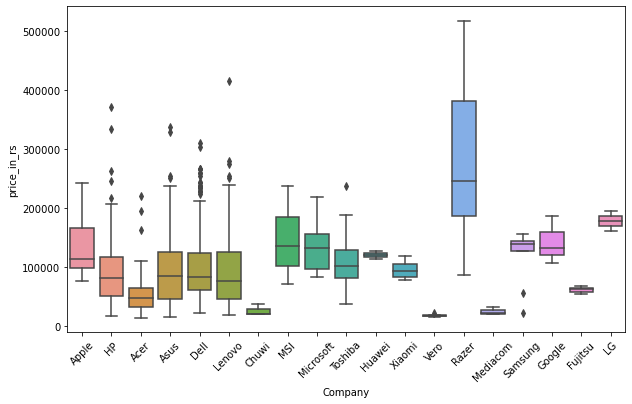

In [36]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Company',y='price_in_rs',data=df_cleaned)
plt.xticks(rotation=45)
plt.show()

###  types with price

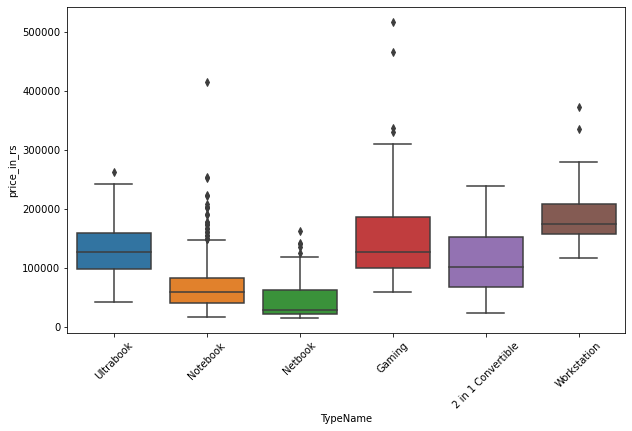

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='TypeName',y='price_in_rs',data=df_cleaned)
plt.xticks(rotation=45)
plt.show()

### Price across OS

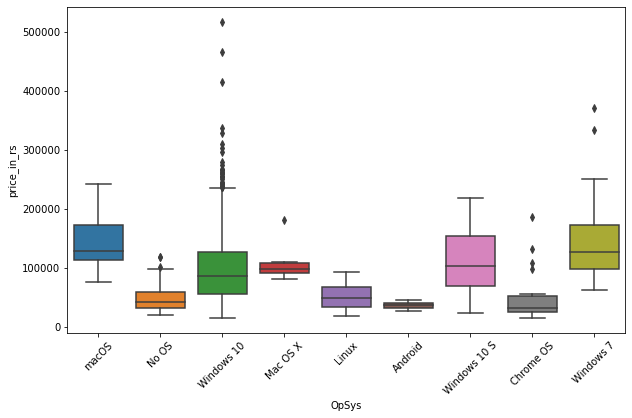

In [38]:
plt.figure(figsize=(10,6))
sns.boxplot(x='OpSys',y='price_in_rs',data=df_cleaned)
plt.xticks(rotation=45)
plt.show()

## Preparing data for model building

In [39]:
df_prepare=df_cleaned.copy()

In [40]:
df_prepare.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,weight_kgs,price_in_rs
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,SSD,Intel Iris Plus Graphics 640,macOS,1.37,113538.7275
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,Flash,Intel HD Graphics 6000,macOS,1.34,76185.1650
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,SSD,Intel HD Graphics 620,No OS,1.86,48731.2500
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,SSD,AMD Radeon Pro 455,macOS,1.83,215048.8875
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,SSD,Intel Iris Plus Graphics 650,macOS,1.37,152855.1000


In [41]:
df_prepare=pd.get_dummies(df_prepare,columns=['Company','OpSys','TypeName','Memory'],drop_first=True,prefix='',prefix_sep='')

In [42]:
df_prepare.head()

,Product,Inches,ScreenResolution,Cpu,Ram,Gpu,weight_kgs,price_in_rs,Apple,Asus,...,Windows 7,macOS,Gaming,Netbook,Notebook,Ultrabook,Workstation,HDD,SSD,SSD and HDD
0,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,Intel Iris Plus Graphics 640,1.37,113538.7275,1,0,...,0,1,0,0,0,1,0,0,1,0
1,Macbook Air,13.3,1440x900,Intel Core i5 1.8GHz,8,Intel HD Graphics 6000,1.34,76185.1650,1,0,...,0,1,0,0,0,1,0,0,0,0
2,250 G6,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,Intel HD Graphics 620,1.86,48731.2500,0,0,...,0,0,0,0,1,0,0,0,1,0
3,MacBook Pro,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,AMD Radeon Pro 455,1.83,215048.8875,1,0,...,0,1,0,0,0,1,0,0,1,0
4,MacBook Pro,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,Intel Iris Plus Graphics 650,1.37,152855.1000,1,0,...,0,1,0,0,0,1,0,0,1,0


In [43]:
df_final=df_prepare.drop(['Product','Inches','ScreenResolution','Cpu','Gpu','weight_kgs'],axis=1)

In [44]:
df_final.head()

,Ram,price_in_rs,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,...,Windows 7,macOS,Gaming,Netbook,Notebook,Ultrabook,Workstation,HDD,SSD,SSD and HDD
0,8,113538.7275,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,8,76185.1650,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,8,48731.2500,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,16,215048.8875,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,8,152855.1000,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


## Model Building

In [45]:
x=df_final.drop(['price_in_rs'],axis=1)
y=df_final['price_in_rs']

In [46]:
x.head()

,Ram,Apple,Asus,Chuwi,Dell,Fujitsu,Google,HP,Huawei,LG,...,Windows 7,macOS,Gaming,Netbook,Notebook,Ultrabook,Workstation,HDD,SSD,SSD and HDD
0,8,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
1,8,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,8,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3,16,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,8,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [47]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Finding best model using GridSearchCV:

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

In [49]:


def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators':[100,250,500,1000],
                 'max_depth':[None,10,15,50],
                'max_features':[0.75],
                'max_samples':[0.5],
                
              
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = KFold(n_splits=5,shuffle=True)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

,model,best_score,best_params
0,linear_regression,0.708631,{'normalize': False}
1,random_forest,0.730634,"{'max_depth': 15, 'max_features': 0.75, 'max_s..."
2,decision_tree,0.711369,"{'criterion': 'mse', 'splitter': 'best'}"


In [50]:
x_test.shape,y_test.shape

((261, 35), (261,))

In [51]:
rf=RandomForestRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=50)
rf.fit(x,y)
rf.score(x_test,y_test)

0.8193370682564061

## Predictions

In [52]:
def predict_price(Ram,Company,TypeName,Memory,OpSys):    
    loc_index = np.where(x.columns==Company)[0][0]
    loc_index1 = np.where(x.columns==TypeName)[0][0]
    loc_index2 = np.where(x.columns==Memory)[0][0]
    loc_index3 = np.where(x.columns==OpSys)[0][0]
    
    X = np.zeros(len(x.columns))
    X[0] = Ram
    #X[1]=Memory

    if loc_index >= 0:
        X[loc_index] = 1
    if loc_index1 >= 0:
        X[loc_index1] = 1
    if loc_index2 >= 0:
        X[loc_index2] = 1
    if loc_index3 >= 0:
        X[loc_index3] = 1
    
    print('\nPrice: ',rf.predict([X])[0]) 

In [ ]:
predict_price(input('Enter RAM: '),input('Enter Brand: '),input('Enter Type: '),input('Enter Memory type: '),input('Enter OS: '))

In [54]:
import pickle

In [55]:
with open('columns.pickle','wb') as f:
    pickle.dump(df_for_web,f)

In [56]:
import pickle
with open('laptop_price_prediction_model.pickle','wb') as f:
    pickle.dump(rf,f)